In [1]:
import sys
import numpy as np
import matplotlib as mp
import pandas as pd
import sklearn as sklrn

print('{}'.format(sys.version))
print('{}'.format(np.__version__))
print('{}'.format(mp.__version__))
print('{}'.format(pd.__version__))
print('{}'.format(sklrn.__version__))

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
1.18.1
3.1.3
1.0.3
0.22.1


In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion',
         'single_epithial_size', 'bare_nuclei', 'blend_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url,names=names)

In [4]:
df.drop(['id'],1,inplace=True)
df

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithial_size,bare_nuclei,blend_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [5]:
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithial_size', 'bare_nuclei',
       'blend_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [6]:
df.shape

(699, 10)

In [7]:
df.replace('?',-99999,inplace=True)

In [8]:
df

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithial_size,bare_nuclei,blend_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [15]:
#dataset visualization
print(df.loc[2])
print(df.describe())

clump_thickness         3
uniform_cell_size       1
uniform_cell_shape      1
marginal_adhesion       1
single_epithial_size    2
bare_nuclei             2
blend_chromatin         3
normal_nucleoli         1
mitoses                 1
class                   2
Name: 2, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithial_size  blend_chromatin  \
count         699.000000            699.000000       699.000000 

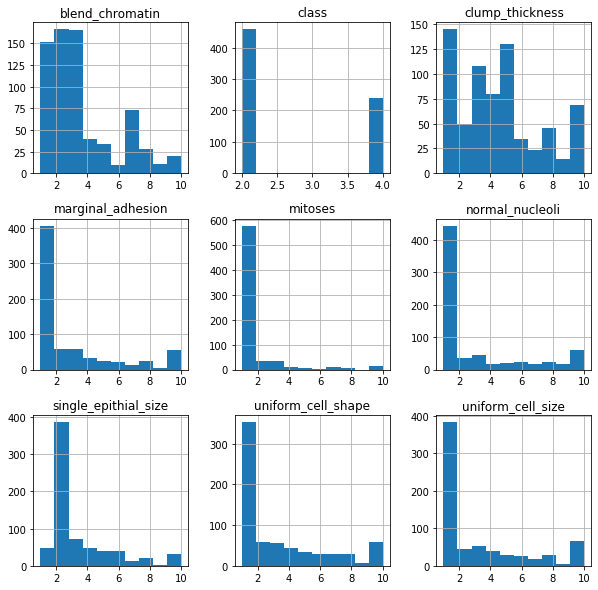

In [16]:
#histogram
df.hist(figsize = (10,10))
plt.show()

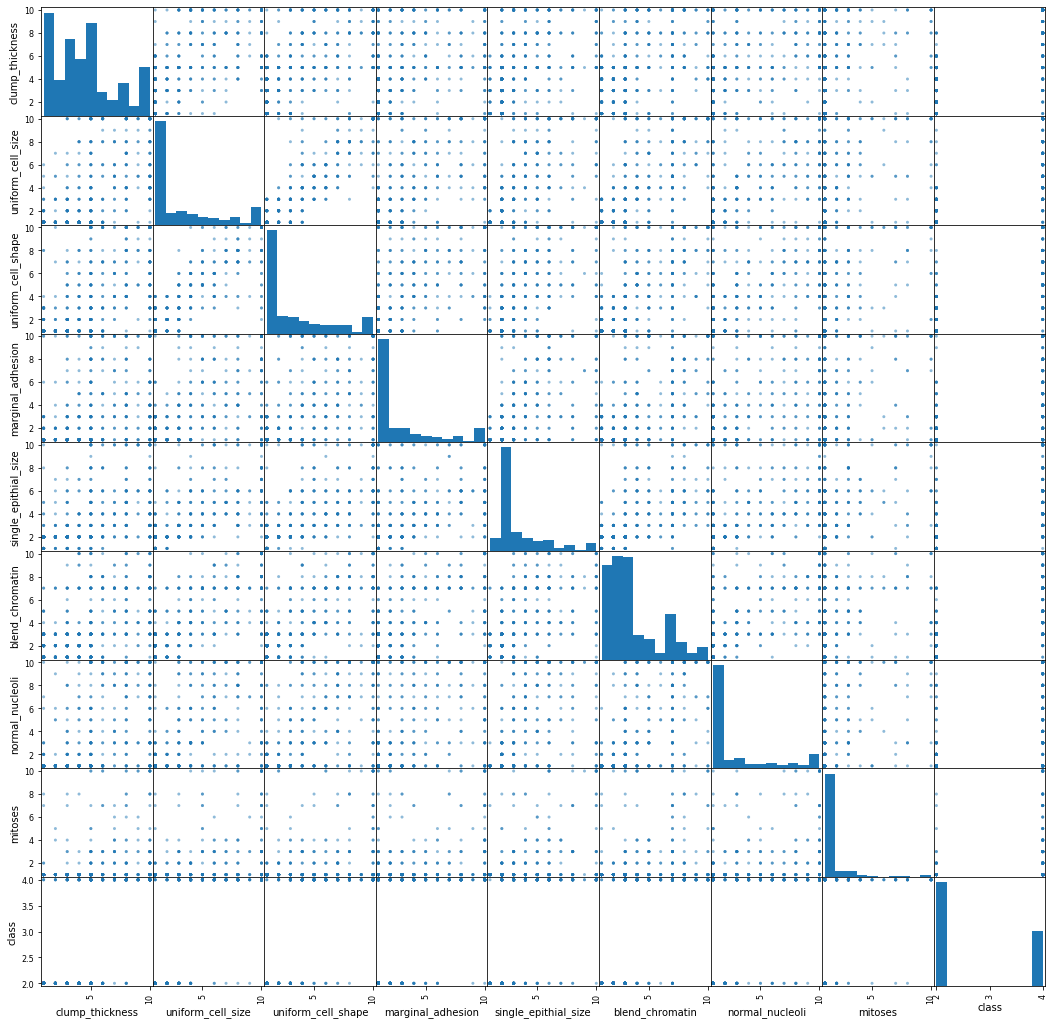

In [17]:
#scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [25]:
#create training dataset
X = df.iloc[:, :-1].values
y = df.iloc[:,9].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 9)
(140, 9)
(559,)
(140,)


In [57]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[89,  1],
       [ 1, 49]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9857142857142858

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        90
           4       0.98      0.98      0.98        50

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



In [77]:
#taking example
example1 = np.array([[10,2,3,1,10,2,3,4,1]])
example1 = example1.reshape(len(example),-1)
prediction = classifier.predict(example1)
print("class - {}".format(prediction))

example2 = np.array([[4,2,1,1,1,2,3,2,4]])
example2 = example2.reshape(len(example2),-1)
prediction = classifier.predict(example2)
print("class - {}".format(prediction))

class - [4]
class - [2]


In [ ]:
#SVM-linear kernel

In [53]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[85  5]
 [ 1 49]]


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9571428571428572

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.94      0.97        90
           4       0.91      0.98      0.94        50

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

